# Import et fonction

    Dans cette partie. On va definir les imports et les differentes fonctions utilisés dans le TME 
    
    SVM est va genere un SVM et Randomforest entraine avec les données train en entrées et generer une prediction avec les données test mis en entree
    
    intervalplot fait comme dans le TME1
    
    Evaluation va faire des statistique sur les données generes par dice ml. Il va calculer la parcimonie moyenne,minimal et maximal et` la distance moyenne, minimal et maximal. Elle va aussi dans la variable score montre la proportion de points correctement genere c'est à dire de la classe opposé

In [1]:
import dice_ml
import numpy as np 
import sklearn as sk
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM



In [2]:
def SVM(trainx,trainy,testx,testy):
    clf =LinearSVC()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return a ,clf

In [3]:
def intervalleplot(x1,x2,y,maxi,mini,a,xx,yy):# permet de plot les points dans un intervalle preci mini-maxi
    if yy==0:
        plt.scatter(xx[0],xx[1],c='blue')
    else:
        plt.scatter(xx[0],xx[1],c='red')
    for n in range(len(x1)):
        if y[n]==0:
            plt.scatter(x1[n],x2[n],c='blue')
        else:
            plt.scatter(x1[n],x2[n],c='red')
    plt.xticks((maxi,mini))
    plt.yticks((maxi,mini))
    plt.show()
    #x_min, x_max =x1.min() - 1, x1.max() + 1
    #y_min, y_max = x2.min() - 1, x2.max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max,),np.arange(y_min, y_max,))            
    #Z=a.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #cs = plt.contourf(xx, yy, Z,)
   # #plt.xticks((maxi,mini))
    #plt.yticks((maxi,mini))
   # plt.show()

In [4]:
def evaluation(generation,y,indice,nomcolone,x):
    compteur=0
    score=0
    for i in generation.values:
        if i[indice]!=y:
            compteur+=1
    score=compteur/len(generation)
    generationv2=generation.drop(nomcolone, axis=1)
    distancemoy=0
    dist=0
    maxi=0
    indicemaxi=0
    mini=10e100
    indicemini=0
    for i in generationv2.values:
        dist=np.linalg.norm(i-x) 
        distancemoy+=dist
        if dist<mini:
            mini=dist
        elif dist>maxi:
            maxi=dist
    parcimonie=0
    parcimaxi=0
    parcimini=10000
    for i in range(len(generationv2.values)):
        parcimoniepoint=0
        for j in range(len(generationv2.values[i])):
            if x.values[0][j]!=generationv2.values[i][j]:
                parcimoniepoint+=1
        parcimonie+=parcimoniepoint
        if parcimoniepoint<parcimini:
            parcimini=parcimoniepoint
        elif parcimoniepoint>parcimaxi:
            parcimaxi=parcimoniepoint
        
    parcimonie=parcimonie/len(generationv2)
    distancemoy=distancemoy/len(generation)
    print(" parcimonie minimale ",parcimini)
    print(" parcimonie max ",parcimaxi)
    print("parcimonie moyenne",parcimonie)
    print("distance moyenne",distancemoy)
    print(" distance minimale ",mini)
    print(" distance max ",)
    print("score = ",score)    

In [5]:
def Randomforest(trainx,trainy,testx,testy):
    clf = RandomForestClassifier()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return clf



#  Données

    Reprise des fonctions du TME1 et creation d'un jeu de données avec un dataframe et des attributs nommés pour dice-ml

In [6]:
def train_test(x,y):
    v=int(len(x)*0.7)
    trainx,testx=x[:v,:], x[v:,:]
    trainy,testy=y[:v], y[v:]
    return trainx,testx,trainy,testy

In [7]:
def données(noises):
    return make_moons(n_samples=1000,noise=noises)

In [8]:
def plot(x,y):
    for n in range(len(x)):
        if y[n]==0:
            plt.scatter(x[n][0],x[n][1],c='blue')
        else:
            plt.scatter(x[n][0],x[n][1],c='red')
    plt.show()

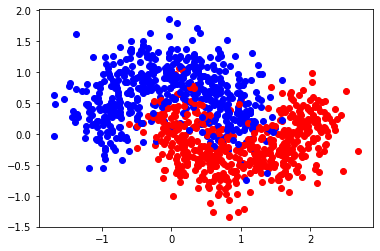

In [9]:
#x,y=données(0)
#x2,y2=données(0.1)
#x3,y3=données(0.2)
x,y=données(0.3)
#plot(x,y)
#plot(x2,y2)
#plot(x3,y3)
plot(x,y)

In [10]:
# Dataframe pour l'entrainement des modeles 
trainx,testx,trainy,testy=train_test(x,y)
dtrainx=pd.DataFrame(data=trainx)
dtestx=pd.DataFrame(data=testx)
dtrainy=pd.Series.ravel(pd.DataFrame(data=trainy))
dtesty=pd.Series.ravel(pd.DataFrame(data=testy))
dtrainx=dtrainx.rename(columns={0: "x1", 1: "x2"})# creation des attributs du dataframes
dtestx=dtestx.rename(columns={0: "x1", 1: "x2"})# creation des attributs du dataframes

#print(dtrainx)

#print(dtestx)

#print(dtrainy)


In [11]:
dataf=pd.DataFrame(data=x) # Dataframe pour dice-ml
feature=["x1","x2"]
outcome="label"

In [12]:
dataf=dataf.rename(columns={0: "x1", 1: "x2"})
dataf["label"] = 0
print(dataf)



           x1        x2  label
0    0.182561  0.147079      0
1    0.421134 -0.366192      0
2    0.196184  0.284227      0
3    0.374682  0.346296      0
4   -1.428416  0.380742      0
..        ...       ...    ...
995  0.322301  0.740379      0
996  1.461603 -0.196227      0
997  0.005070  0.593484      0
998 -0.155865  0.320025      0
999  0.558569 -0.437953      0

[1000 rows x 3 columns]


# Partie creation dice-ml

      Utilisation de dice-ml pour genere les ensembles d'exemples   contre factuel 

In [13]:

data=dice_ml.Data(dataframe=dataf,continuous_features=feature,outcome_name=outcome)

In [14]:
a=Randomforest(dtrainx,dtrainy,dtestx,dtesty)
datatest=pd.DataFrame(data=dtrainx)
#a.predict(pd.DataFrame({"x1":[0.565300],"x2":[0.653995]}))

In [15]:
model = dice_ml.Model(model=a, backend="sklearn")


In [16]:
explainer = dice_ml.Dice(data, model,method="random")
counterfactuel= explainer.generate_counterfactuals


# Differentes experiences avec dice-ml

 Generation d'ensemble d'exemple contre factuel ensuite on les affiches puis on fait utilise evaluation pour avoir plus d'infos. On modifie l'exeple, apres on fait varier une seul des dimensions puis on test avec un autre classifieur
     
 Petit probleme. dice-ml ne fonctionne pas tout le temps. Je n'ai pas compris pourquoi. Il faut parfoit relance les cellules. Si cela persiste, on peux diminuer le nombre de tour dans les boucle for

1


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


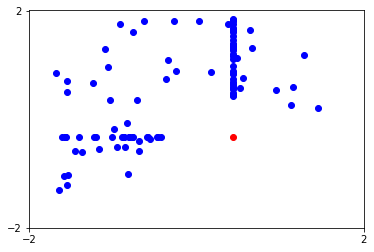

 parcimonie minimale  1
 parcimonie max  2
parcimonie moyenne 1.43
distance moyenne 1.5562600691612432
 distance minimale  0.7653216144847655
 distance max 
score =  1.0
0


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


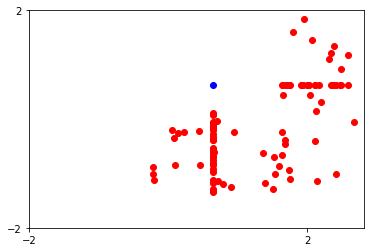

 parcimonie minimale  1
 parcimonie max  2
parcimonie moyenne 1.45
distance moyenne 1.436289204801168
 distance minimale  0.5227893401360514
 distance max 
score =  1.0
0


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]


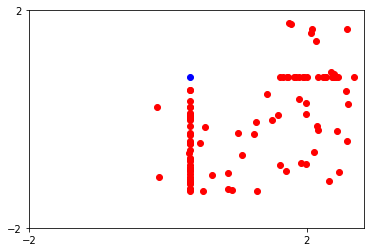

 parcimonie minimale  1
 parcimonie max  2
parcimonie moyenne 1.43
distance moyenne 1.6538651718353146
 distance minimale  0.23827551852070195
 distance max 
score =  1.0
1


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


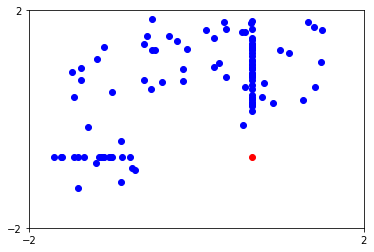

 parcimonie minimale  1
 parcimonie max  2
parcimonie moyenne 1.5
distance moyenne 1.8551147650784583
 distance minimale  0.5961895150340111
 distance max 
score =  1.0
1


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


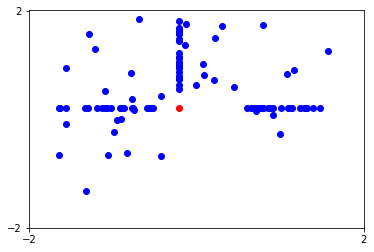

 parcimonie minimale  1
 parcimonie max  2
parcimonie moyenne 1.34
distance moyenne 1.038020566230035
 distance minimale  0.30055199713196823
 distance max 
score =  1.0


In [20]:
# variation de l'exemple requete 
for i in range(5):
    indice=random.randint(0, len(datatest))
    x1test=datatest["x1"][indice]
    x2test=datatest["x2"][indice]
    #print(dtrainy[indice])
    E=explainer.generate_counterfactuals(query_instances=pd.DataFrame({"x1":[x1test],"x2":[x2test]}),total_CFs=100,proximity_weight=1)
    L=E.cf_examples_list
    cfs=L[0].final_cfs_df
    intervalleplot(cfs["x1"],cfs["x2"],cfs["label"],2,-2,a,[x1test,x2test],dtrainy[indice])
    evaluation(cfs,dtrainy[indice],2,"label",pd.DataFrame({"x1":[x1test],"x2":[x2test]}))



0


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


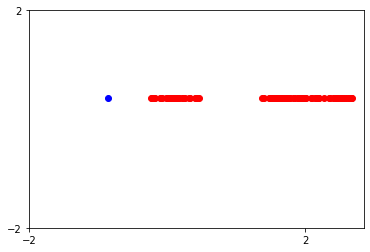

 parcimonie minimale  1
 parcimonie max  1
parcimonie moyenne 1.0
distance moyenne 2.2536055560856085
 distance minimale  0.626907203047609
 distance max 
score =  1.0
1


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


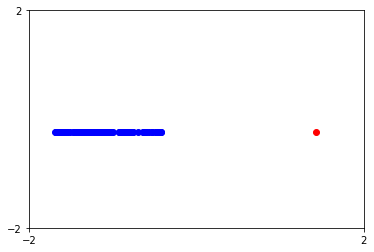

 parcimonie minimale  1
 parcimonie max  1
parcimonie moyenne 1.0
distance moyenne 2.509036307879264
 distance minimale  1.8471249407342656
 distance max 
score =  1.0
1


100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


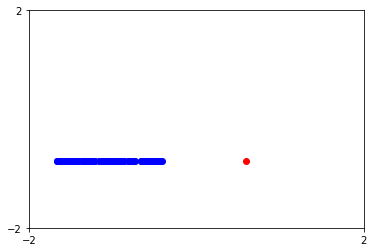

 parcimonie minimale  1
 parcimonie max  1
parcimonie moyenne 1.0
distance moyenne 1.6061153016503444
 distance minimale  1.0039578653533443
 distance max 
score =  1.0


In [23]:
# on n'autorise la modification d'une seul des dimensions
for i in range(3):
    indice=random.randint(0, len(datatest))
    x1test=datatest["x1"][indice]
    x2test=datatest["x2"][indice]
    #print(dtrainy[indice])
    E=explainer.generate_counterfactuals(query_instances=pd.DataFrame({"x1":[x1test],"x2":[x2test]}),features_to_vary= ["x1"],total_CFs=100,proximity_weight=1)
    L=E.cf_examples_list
    cfs=L[0].final_cfs_df
    intervalleplot(cfs["x1"],cfs["x2"],cfs["label"],2,-2,a,[x1test,x2test],dtrainy[indice])
    evaluation(cfs,dtrainy[indice],2,"label",pd.DataFrame({"x1":[x1test],"x2":[x2test]}))
    

In [30]:
a2,SVM=SVM(dtrainx,dtrainy,dtestx,dtesty)



In [36]:
# variation du classiffieur
modelsvm = dice_ml.Model(model=SVM, backend="sklearn")
explainerSVM = dice_ml.Dice(data, model,method="random")
counterfactuelSVM= explainerSVM.generate_counterfactuals
for i in range(3):
    indice=random.randint(0, len(datatest))
    x1test=datatest["x1"][indice]
    x2test=datatest["x2"][indice]
    
    ESVM=explainerSVM.generate_counterfactuals(query_instances=pd.DataFrame({"x1":[x1test],"x2":[x2test]}),total_CFs=100,proximity_weight=1)
    LSVM=ESVM.cf_examples_list
    cfsSVM=LSVM[0].final_cfs_df
    #print(cfsSVM)
    
    intervalleplot(cfsSVM["x1"],cfsSVM["x2"],cfsSVM["label"],2,-2,a,[x1test,x2test],dtrainy[indice])
    evaluation(cfsSVM,dtrainy[indice],2,"label",pd.DataFrame({"x1":[x1test],"x2":[x2test]}))

  0%|                                                                      | 0/1 [00:07<?, ?it/s]


KeyboardInterrupt: 

# cas d'un dataset à plus de 2 dimension ( iris sur sklearn)

J'ai utilise le dataset iris car plus facile à utiliser les resultats que ceux utilise dans le TME1 notamment quand il faut renommer les colonnes du dataframe

In [37]:
def Randomforest(trainx,trainy,testx,testy):
    clf = RandomForestClassifier()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return clf

In [38]:
iris = datasets.load_iris()
X = iris.data[:100] 
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [39]:
dfx_train=pd.DataFrame(data=X_train)
dfx_testx=pd.DataFrame(data=X_test)
dfy_train=pd.DataFrame(data=y_train)
dfy_testy=pd.DataFrame(data=y_test)

dfx_train=dfx_train.rename(columns={0: "Sepall", 1: "Sepalw",2:"PetalL",3:"PetalW"})
dfx_testx=dfx_testx.rename(columns={0: "Sepall", 1: "Sepalw",2:"PetalL",3:"PetalW"})
dfy_train=pd.Series.ravel(dfy_train)# passage des classes en 1d


dfy_testy=pd.Series.ravel(dfy_testy)# passage des classes en 1d
#dfx_train["label"]=0
#dfx_testx["label"]=0




print(dfx_train)





    Sepall  Sepalw  PetalL  PetalW
0      5.7     2.8     4.5     1.3
1      5.6     3.0     4.1     1.3
2      5.0     3.4     1.6     0.4
3      4.4     3.2     1.3     0.2
4      5.6     2.5     3.9     1.1
..     ...     ...     ...     ...
75     5.0     2.0     3.5     1.0
76     6.1     2.8     4.0     1.3
77     5.8     4.0     1.2     0.2
78     5.8     2.6     4.0     1.2
79     6.4     3.2     4.5     1.5

[80 rows x 4 columns]


In [40]:
b=Randomforest(dfx_train,dfy_train,dfx_testx,dfy_testy)
features=[]
for i in dfx_testx.columns:
    print(i)
    features.append(i)
print(features)


outcome="label"

Sepall
Sepalw
PetalL
PetalW
['Sepall', 'Sepalw', 'PetalL', 'PetalW']


In [41]:
dataf2=pd.DataFrame(data=dfx_testx)
dataf2["label"]=0
print(dataf2)

data2=dice_ml.Data(dataframe=dataf2,continuous_features=features,outcome_name=outcome)
model = dice_ml.Model(model=b, backend="sklearn")




    Sepall  Sepalw  PetalL  PetalW  label
0      6.0     2.7     5.1     1.6      0
1      5.5     2.3     4.0     1.3      0
2      5.9     3.2     4.8     1.8      0
3      4.8     3.0     1.4     0.3      0
4      5.1     3.8     1.9     0.4      0
5      5.1     3.4     1.5     0.2      0
6      4.6     3.6     1.0     0.2      0
7      5.5     2.4     3.8     1.1      0
8      5.4     3.7     1.5     0.2      0
9      5.1     3.5     1.4     0.2      0
10     5.7     3.8     1.7     0.3      0
11     4.8     3.1     1.6     0.2      0
12     6.1     2.8     4.7     1.2      0
13     5.5     4.2     1.4     0.2      0
14     5.5     2.6     4.4     1.2      0
15     5.0     3.6     1.4     0.2      0
16     6.8     2.8     4.8     1.4      0
17     6.7     3.0     5.0     1.7      0
18     4.8     3.0     1.4     0.1      0
19     5.4     3.4     1.5     0.4      0


In [42]:
explainer2 = dice_ml.Dice(data2, model,method="random")
counterfactuel2= explainer.generate_counterfactuals

In [43]:
# creation des Datasets
indice=random.randint(0, len(dfx_testx))
dim1=dfx_testx["Sepall"][indice]
dim2=dfx_testx["Sepalw"][indice]
dim3=dfx_testx["PetalL"][indice]
dim4=dfx_testx["PetalW"][indice]

print(dim1)

print(dim2)

print(dim3)

print(dim4)



5.1
3.4
1.5
0.2


In [44]:
E2=explainer2.generate_counterfactuals(query_instances=pd.DataFrame({"Sepall":[dim1],"Sepalw":[dim2],"PetalL":[dim3],"PetalW":[dim4]}),total_CFs=200,proximity_weight=4)
L2=E2.cf_examples_list
cfs2=L2[0].final_cfs_df
print(cfs2)
evaluation(cfs2,dfy_testy[indice],4,"label",pd.DataFrame({"Sepall":[dim1],"Sepalw":[dim2],"PetalL":[dim3],"PetalW":[dim4]}))

100%|██████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.74s/it]

     Sepall  Sepalw  PetalL  PetalW  label
0       5.3     3.4     3.0     1.5      1
1       5.1     3.1     3.3     1.4      1
2       5.1     3.4     1.2     1.6      0
3       6.5     2.8     1.5     1.5      1
4       5.1     3.5     1.5     1.2      0
..      ...     ...     ...     ...    ...
195     5.1     2.6     1.5     1.7      1
196     5.1     2.9     1.5     1.9      1
197     5.1     3.4     4.1     0.8      1
198     5.1     3.4     1.1     1.1      0
199     5.9     3.4     4.0     1.7      1

[200 rows x 5 columns]
 parcimonie minimale  1
 parcimonie max  3
parcimonie moyenne 2.37
distance moyenne 1.9710270415567035
 distance minimale  0.7615773105863908
 distance max 
score =  0.785
